# Step 0 - Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

# Step 1 - Loading datasaet

In [2]:
dataset = pd.read_csv("Data.csv")

# Step 2 - Undertanding data

In [3]:
dataset.head(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
dataset.tail(5)

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
30692,Jump Shot,Jump Shot,397,49900088,33.9963,1,48,-118.2688,6,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30693
30693,Tip Shot,Tip Shot,398,49900088,34.0443,0,0,-118.2698,6,4,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30694
30694,Running Jump Shot,Jump Shot,426,49900088,33.8783,-134,166,-118.4038,3,4,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30695
30695,Jump Shot,Jump Shot,448,49900088,33.7773,31,267,-118.2388,2,4,...,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30696
30696,Jump Shot,Jump Shot,471,49900088,33.9723,1,72,-118.2688,0,4,...,2PT Field Goal,Center(C),In The Paint (Non-RA),Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-06-19,LAL vs. IND,IND,30697


In [5]:
dataset.shape

(30697, 25)

In [6]:
dataset['team_id'].unique()

array([1610612747], dtype=int64)

In [7]:
# Dropping columns that have zero variance/ insignificant
dataset.drop(['team_id', 'team_name', 'shot_id', 'matchup'], axis = 1, inplace = True)

In [8]:
dataset.shape

(30697, 21)

In [9]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'game_date', 'opponent'],
      dtype='object')

# Step 3 - Visualizing data and gathering insights

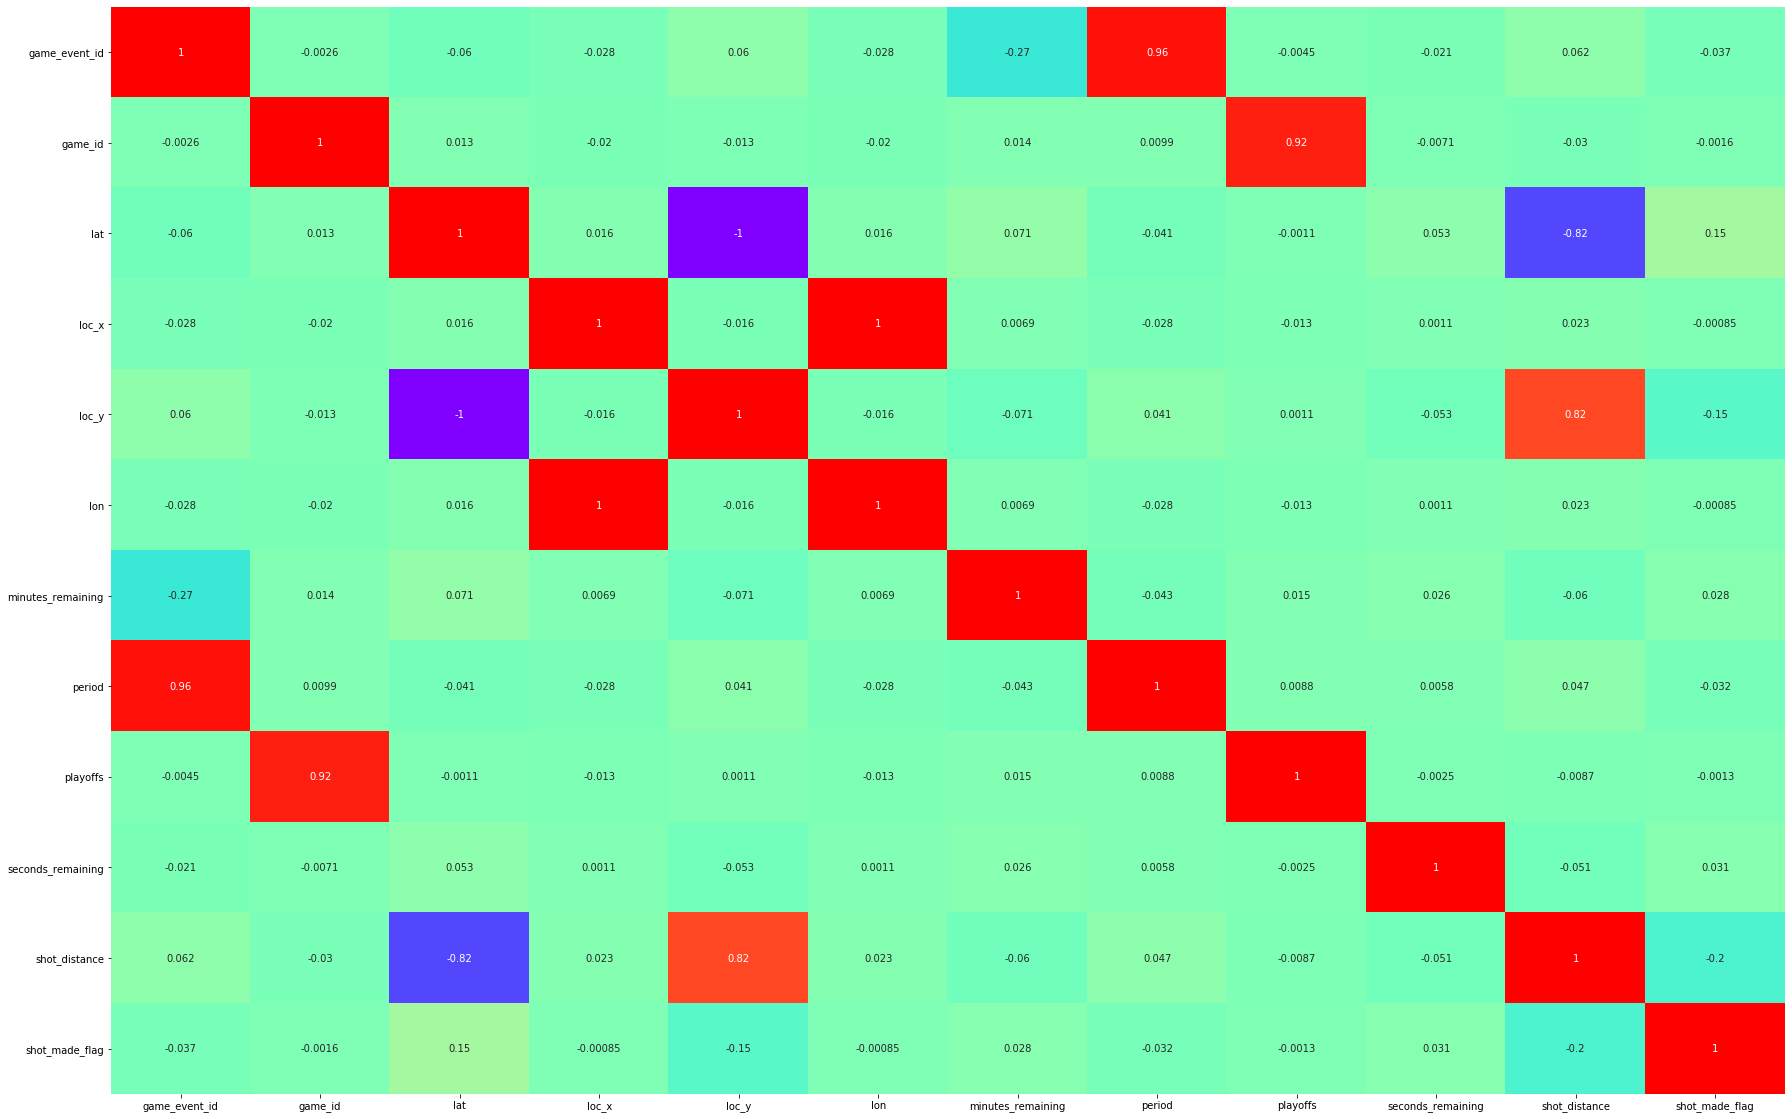

In [10]:
# Checking correlation between variables
plt.figure(figsize = (30,20))
sns.heatmap(data = dataset.corr(), annot = True, cbar = False, cmap = 'rainbow')

In [11]:
# Game Event ID and Game ID do not provide any useful detail
dataset.drop(['game_event_id', 'game_id'], axis = 1, inplace = True)

In [12]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'lat', 'loc_x', 'loc_y', 'lon',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent'],
      dtype='object')

In [13]:
# 'Loc x and Lon' and 'Loc y and Lat' are co-related
dataset.drop(['lon', 'lat'], axis = 1, inplace = True)

In [14]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y',
       'minutes_remaining', 'period', 'playoffs', 'season',
       'seconds_remaining', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent'],
      dtype='object')

In [15]:
# Converting minutes and seconds into new variable i.e. time remaining in seconds
dataset['time_remaining'] = dataset['minutes_remaining'] * 60  + dataset['seconds_remaining']

In [16]:
dataset[['minutes_remaining', 'seconds_remaining', 'time_remaining']]

,minutes_remaining,seconds_remaining,time_remaining
0,10,27,627
1,10,22,622
2,7,45,465
3,6,52,412
4,6,19,379
...,...,...,...
30692,6,5,365
30693,6,5,365
30694,3,28,208
30695,2,10,130


In [17]:
# Since, a new variable is featured, existing 2 variables are not required.
dataset.drop(['minutes_remaining', 'seconds_remaining'], axis = 1, inplace = True)

In [18]:
dataset.shape

(30697, 16)

In [19]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent', 'time_remaining'],
      dtype='object')

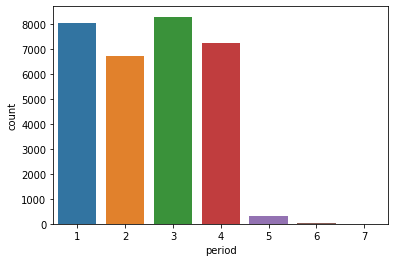

In [20]:
sns.countplot(x = 'period', data = dataset)

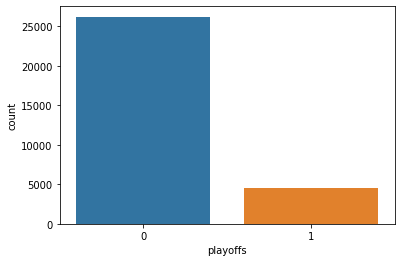

In [21]:
sns.countplot(x = 'playoffs', data = dataset)

In [22]:
# Converting season YYYY-yyyy format to YYYY
dataset['season'] = dataset['season'].apply(lambda x: x[:4])
dataset['season'] = pd.to_numeric(dataset['season'])

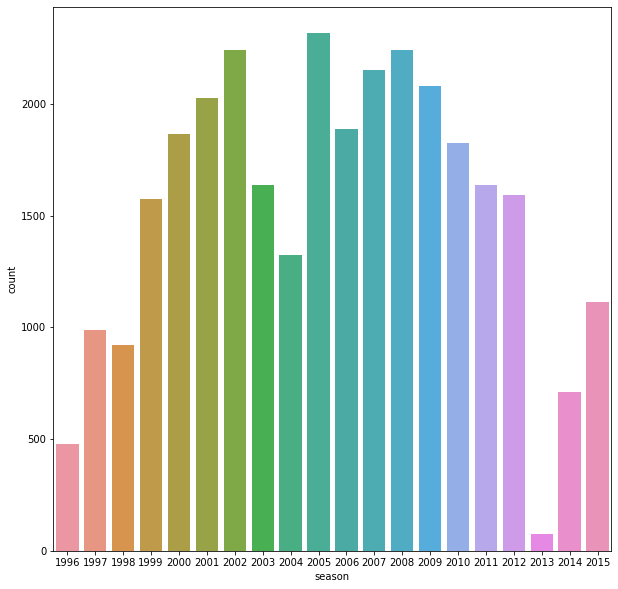

In [23]:
plt.figure(figsize = (10,10))
sns.countplot(x = 'season', data = dataset)

In [24]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent', 'time_remaining'],
      dtype='object')

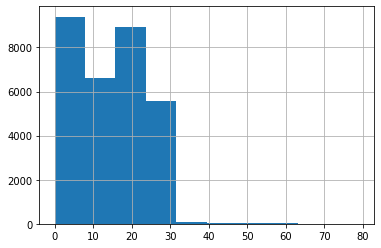

In [25]:
dataset['shot_distance'].hist()

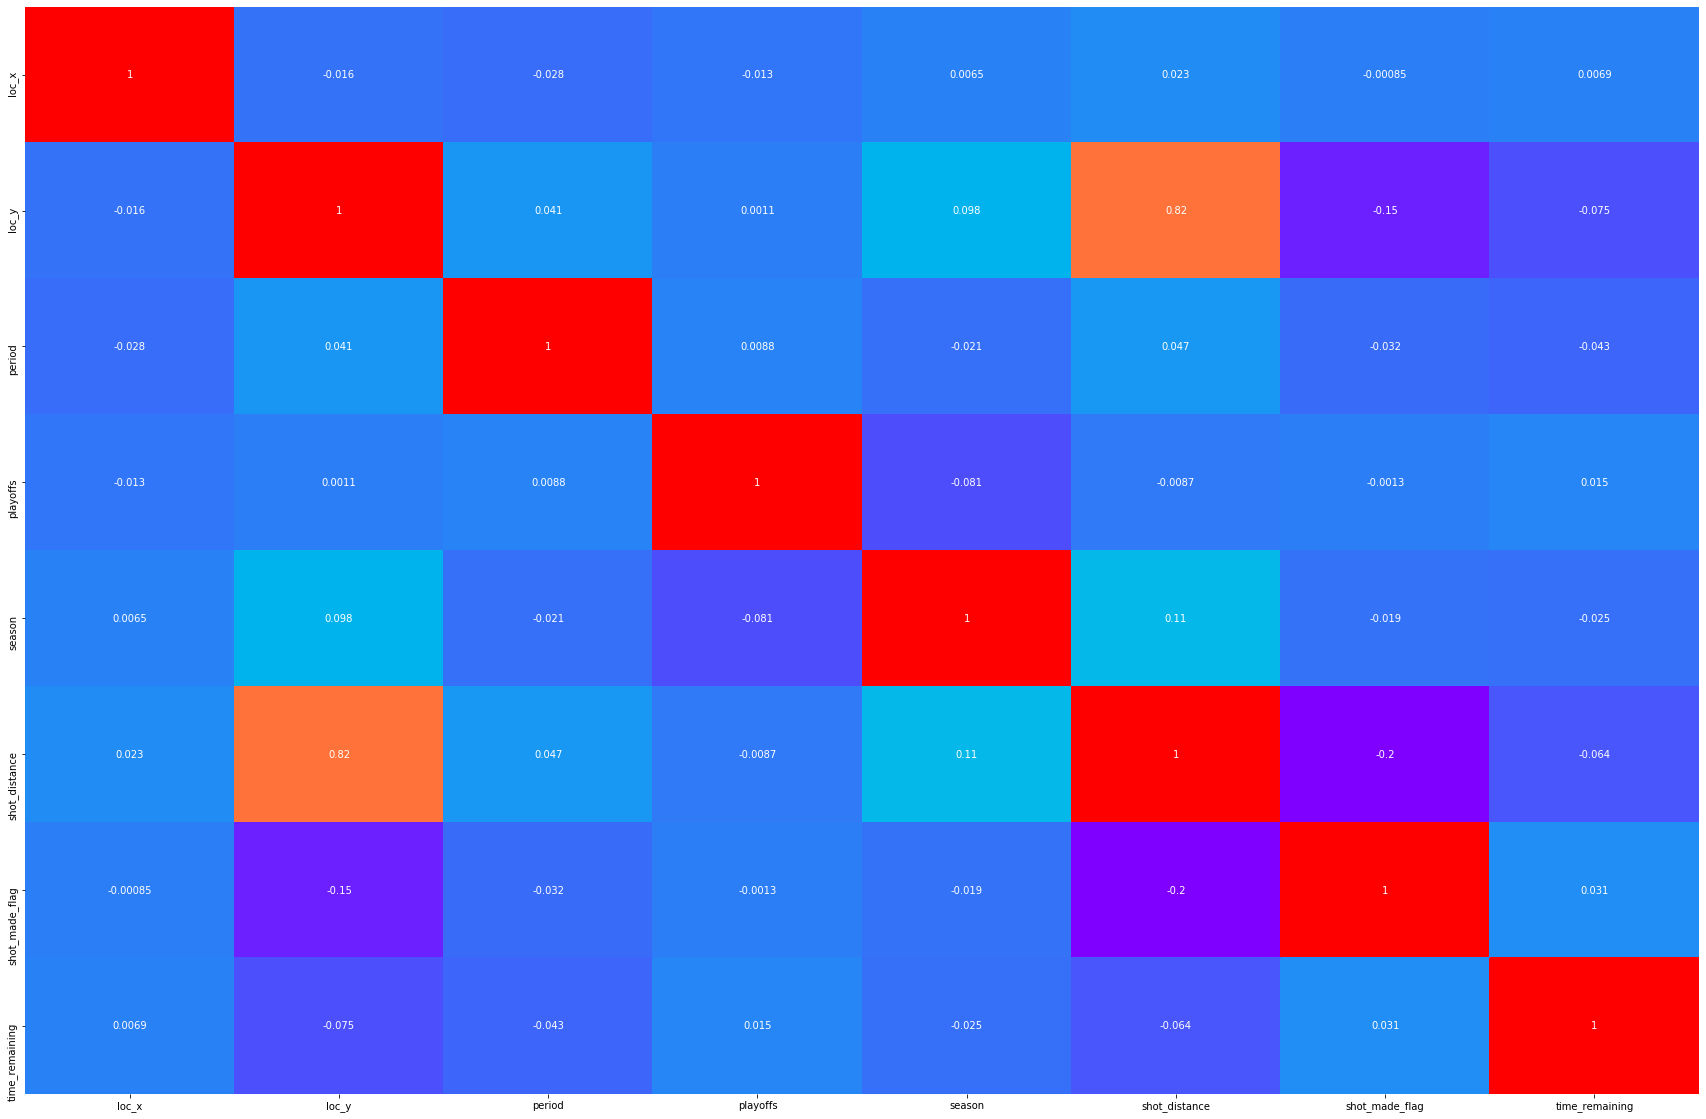

In [26]:
plt.figure(figsize = (30,20))
sns.heatmap(data = dataset.corr(), annot = True, cbar = False, cmap = 'rainbow')

In [27]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'shot_zone_range', 'game_date',
       'opponent', 'time_remaining'],
      dtype='object')

In [28]:
dataset['shot_type'].unique()

array(['2PT Field Goal', '3PT Field Goal'], dtype=object)

In [29]:
dataset['shot_zone_area'].unique()

array(['Right Side(R)', 'Left Side(L)', 'Left Side Center(LC)',
       'Right Side Center(RC)', 'Center(C)', 'Back Court(BC)'],
      dtype=object)

In [30]:
dataset['shot_zone_basic'].unique()

array(['Mid-Range', 'Restricted Area', 'In The Paint (Non-RA)',
       'Above the Break 3', 'Right Corner 3', 'Backcourt',
       'Left Corner 3'], dtype=object)

In [31]:
dataset['shot_zone_range'].unique()

array(['16-24 ft.', '8-16 ft.', 'Less Than 8 ft.', '24+ ft.',
       'Back Court Shot'], dtype=object)

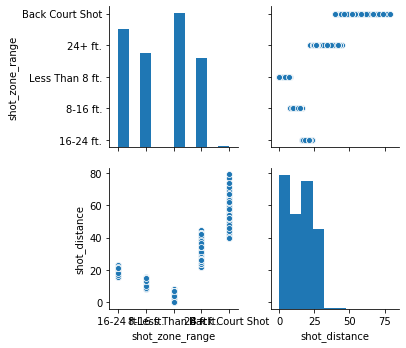

In [32]:
sns.pairplot(data = dataset, vars = ['shot_zone_range', 'shot_distance'])

In [33]:
dataset.drop('shot_zone_range', axis = 1, inplace = True)

In [34]:
dataset.shape

(30697, 15)

In [35]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'game_date', 'opponent',
       'time_remaining'],
      dtype='object')

In [36]:
dataset['game_date'] = pd.to_datetime(dataset['game_date'])

In [37]:
dataset['game_year'] = dataset['game_date'].dt.year
dataset['game_month'] = dataset['game_date'].dt.month
dataset['game_day'] = dataset['game_date'].dt.dayofweek

In [38]:
dataset.drop('game_date', axis = 1, inplace = True)

In [39]:
dataset.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'opponent', 'time_remaining',
       'game_year', 'game_month', 'game_day'],
      dtype='object')

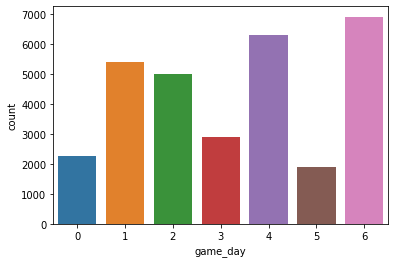

In [40]:
sns.countplot(x = 'game_day', data = dataset)

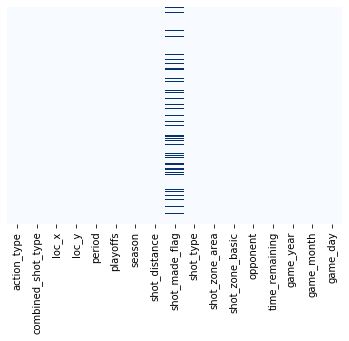

In [41]:
sns.heatmap(dataset.isnull(), yticklabels=False, cbar = False, cmap='Blues')

In [42]:
dataset.shape

(30697, 17)

In [43]:
dataset.head(5)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,opponent,time_remaining,game_year,game_month,game_day
0,Jump Shot,Jump Shot,167,72,1,0,2000,18,NaN,2PT Field Goal,Right Side(R),Mid-Range,POR,627,2000,10,1
1,Jump Shot,Jump Shot,-157,0,1,0,2000,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,POR,622,2000,10,1
2,Jump Shot,Jump Shot,-101,135,1,0,2000,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,POR,465,2000,10,1
3,Jump Shot,Jump Shot,138,175,1,0,2000,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,POR,412,2000,10,1
4,Driving Dunk Shot,Dunk,0,0,2,0,2000,0,1.0,2PT Field Goal,Center(C),Restricted Area,POR,379,2000,10,1


In [44]:
data = dataset[dataset['shot_made_flag'].notnull()]

In [45]:
data.shape

(25697, 17)

In [46]:
shot_goal = data[data['shot_made_flag'] == 1]

In [47]:
shot_not_goal = data[data['shot_made_flag'] == 0]

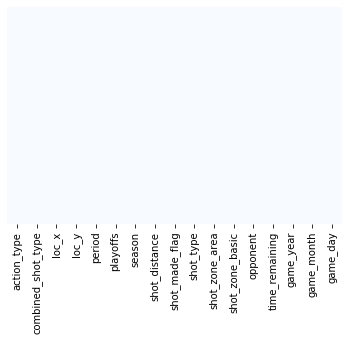

In [48]:
sns.heatmap(data.isnull(), yticklabels=False, cbar = False, cmap='Blues')

In [49]:
print('Total = ', len(data))
print('Number of Goals made = ', len(shot_goal))
print('Number of Goals not made = ', len(shot_not_goal))
print('% of goals made = ', 1 * len(shot_goal)/ len(data) *100)
print('% of goals not made = ', 1 * len(shot_not_goal)/ len(data) *100)

Total =  25697
Number of Goals made =  11465
Number of Goals not made =  14232
% of goals made =  44.61610304704829
% of goals not made =  55.38389695295171


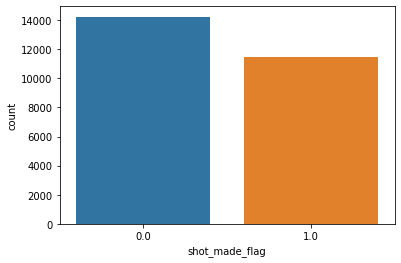

In [50]:
sns.countplot(x = 'shot_made_flag', data = data)

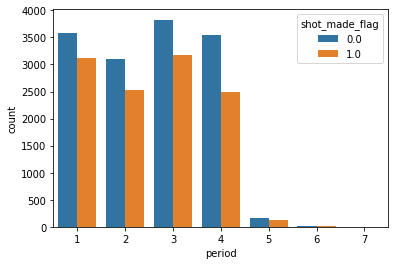

In [51]:
sns.countplot(x="period", hue="shot_made_flag", data=data)

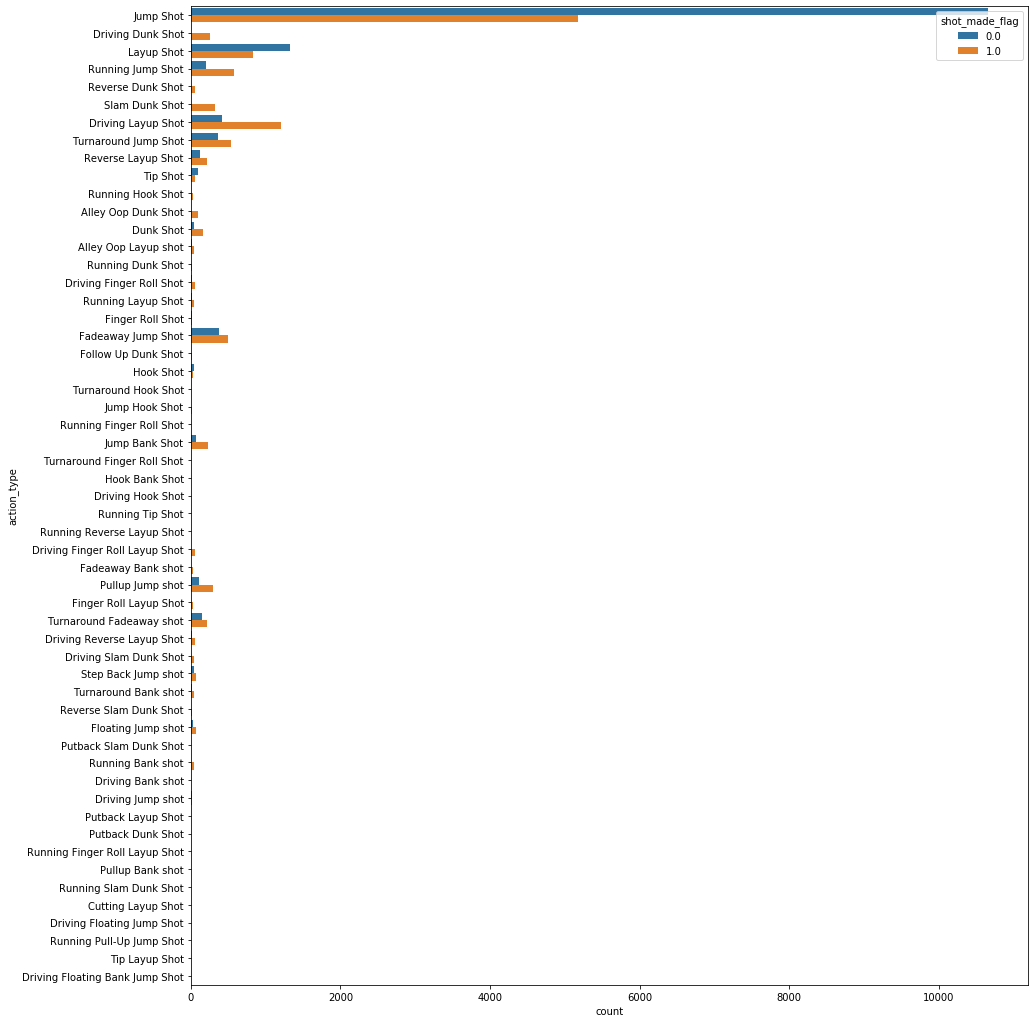

In [52]:
plt.figure(figsize = (15,18))
sns.countplot(y="action_type", hue="shot_made_flag", data=data)

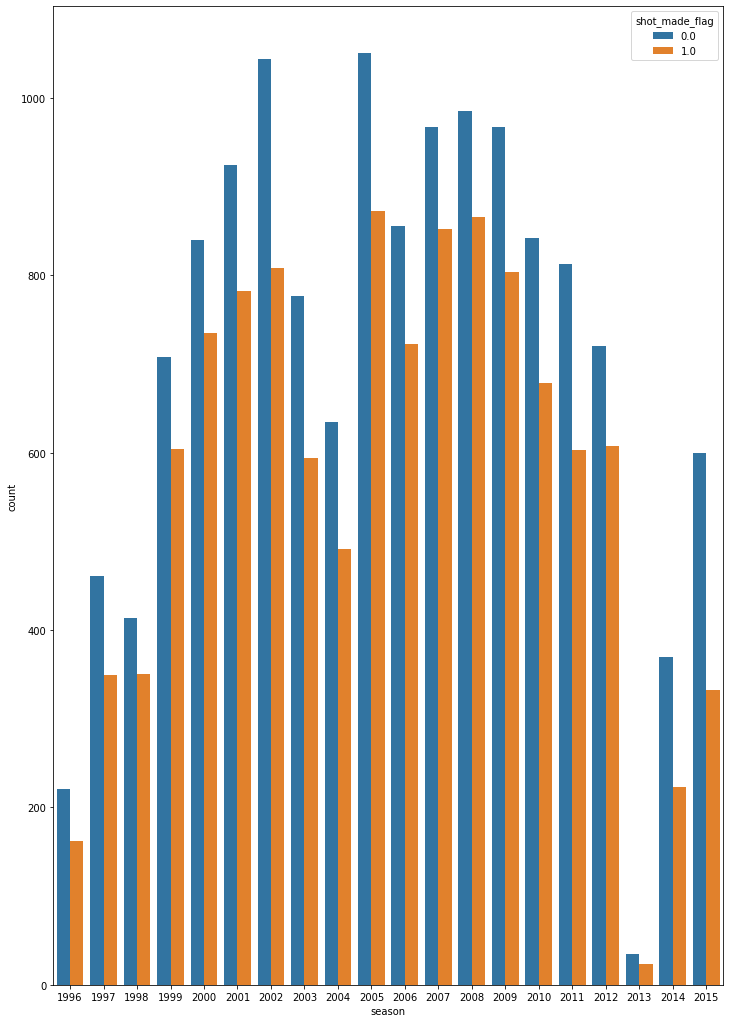

In [53]:
plt.figure(figsize = (12,18))
sns.countplot(x="season", hue="shot_made_flag", data=data)

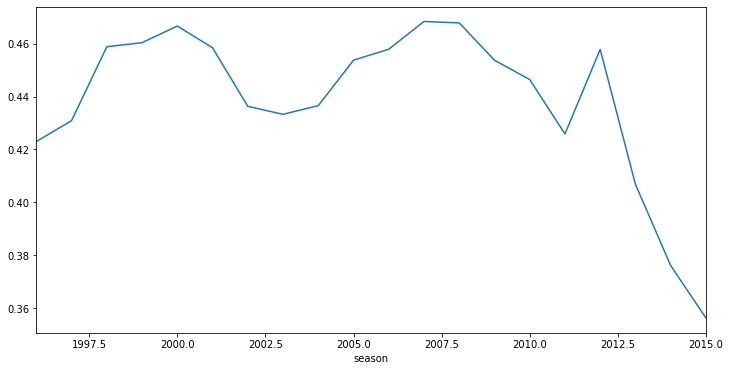

In [54]:
plt.figure(figsize = (12,6))
data['shot_made_flag'].groupby(data['season']).mean().plot()

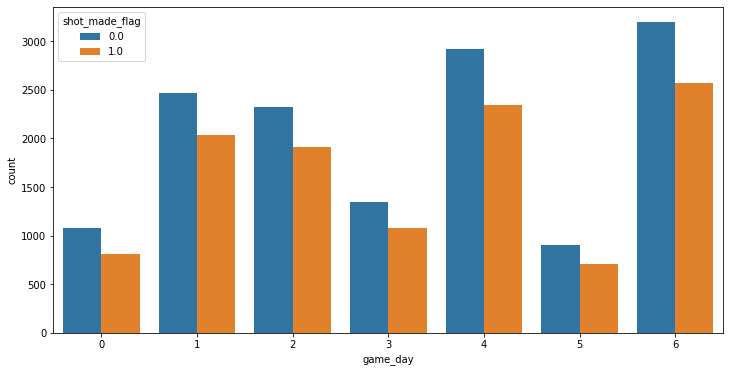

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(x="game_day", hue="shot_made_flag", data=data)

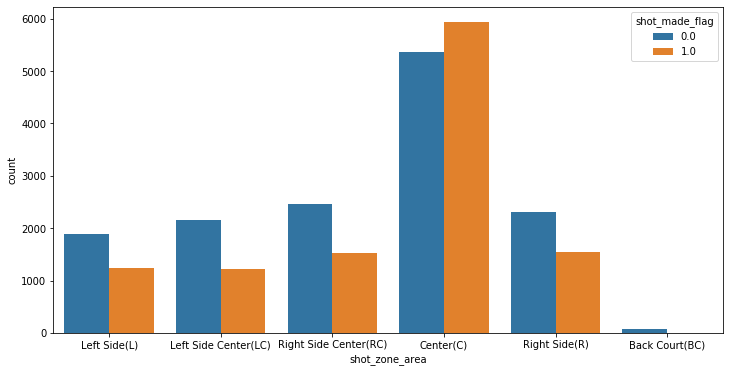

In [56]:
plt.figure(figsize=(12,6))
sns.countplot(x="shot_zone_area", hue="shot_made_flag", data=data)

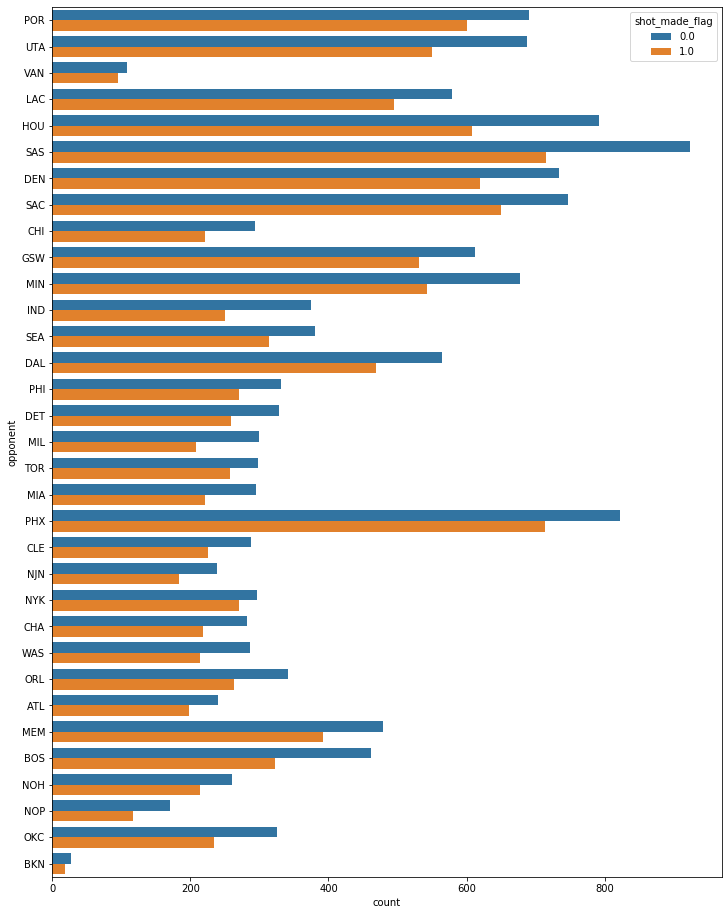

In [57]:
plt.figure(figsize=(12,16))
sns.countplot(y="opponent", hue="shot_made_flag", data=data)

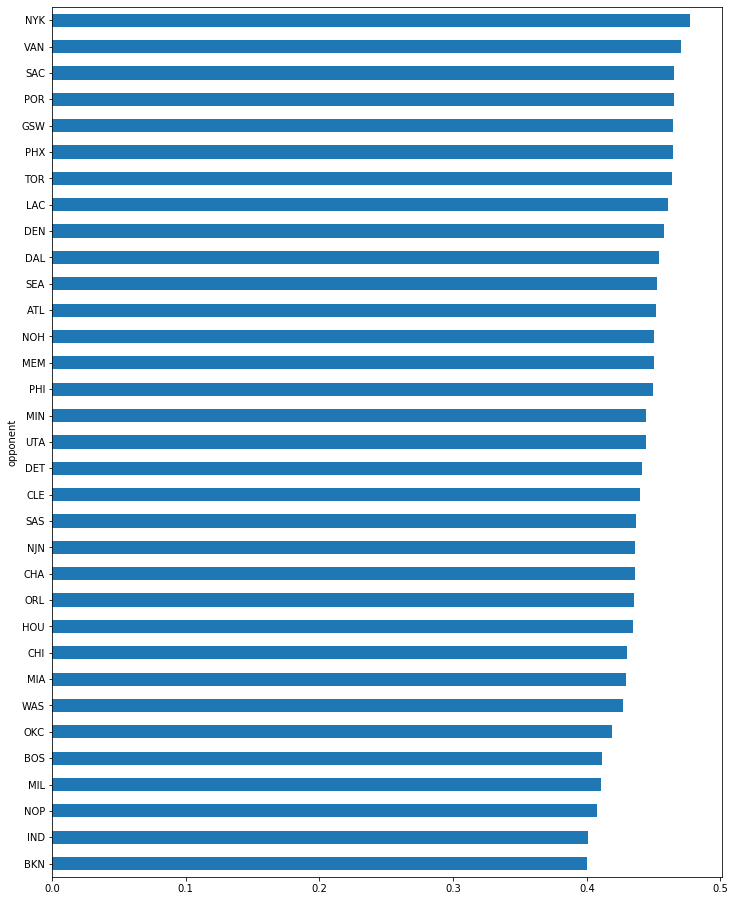

In [58]:
plt.figure(figsize=(12,16))
data['shot_made_flag'].groupby(data['opponent']).mean().sort_values().plot(kind = 'barh')

In [59]:
data.shape

(25697, 17)

In [60]:
data.head(5)

,action_type,combined_shot_type,loc_x,loc_y,period,playoffs,season,shot_distance,shot_made_flag,shot_type,shot_zone_area,shot_zone_basic,opponent,time_remaining,game_year,game_month,game_day
1,Jump Shot,Jump Shot,-157,0,1,0,2000,15,0.0,2PT Field Goal,Left Side(L),Mid-Range,POR,622,2000,10,1
2,Jump Shot,Jump Shot,-101,135,1,0,2000,16,1.0,2PT Field Goal,Left Side Center(LC),Mid-Range,POR,465,2000,10,1
3,Jump Shot,Jump Shot,138,175,1,0,2000,22,0.0,2PT Field Goal,Right Side Center(RC),Mid-Range,POR,412,2000,10,1
4,Driving Dunk Shot,Dunk,0,0,2,0,2000,0,1.0,2PT Field Goal,Center(C),Restricted Area,POR,379,2000,10,1
5,Jump Shot,Jump Shot,-145,-11,3,0,2000,14,0.0,2PT Field Goal,Left Side(L),Mid-Range,POR,572,2000,10,1


In [61]:
data.columns

Index(['action_type', 'combined_shot_type', 'loc_x', 'loc_y', 'period',
       'playoffs', 'season', 'shot_distance', 'shot_made_flag', 'shot_type',
       'shot_zone_area', 'shot_zone_basic', 'opponent', 'time_remaining',
       'game_year', 'game_month', 'game_day'],
      dtype='object')

# Step 4 - Making data viable for model

In [62]:
# Encoding categorical variables
categ = ['action_type', 'combined_shot_type', 'shot_type', 'shot_zone_area', 'shot_zone_basic', 'opponent', 'period', 'season', 'game_year', 'game_month', 'game_day', 'loc_x', 'loc_y']

for i in categ:
    dummies = pd.get_dummies(data[i], drop_first = True)
    dummies = dummies.add_prefix("{}#".format(i))
    data.drop(i, axis = 1, inplace = True)
    data = data.join(dummies)

C:\Users\17655\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [63]:
data.shape

(25697, 1096)

In [64]:
data.head(5)

,playoffs,shot_distance,shot_made_flag,time_remaining,action_type#Alley Oop Layup shot,action_type#Cutting Layup Shot,action_type#Driving Bank shot,action_type#Driving Dunk Shot,action_type#Driving Finger Roll Layup Shot,action_type#Driving Finger Roll Shot,...,loc_y#664,loc_y#679,loc_y#696,loc_y#697,loc_y#702,loc_y#711,loc_y#728,loc_y#741,loc_y#773,loc_y#791
1,0,15,0.0,622,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,16,1.0,465,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,22,0.0,412,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1.0,379,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,14,0.0,572,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
X = data.drop('shot_made_flag', axis = 1).values

In [66]:
y = data['shot_made_flag'].values

In [67]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Step 5 - Building model

## Step 5a - Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

C:\Users\17655\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [72]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix, classification_report

In [74]:
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

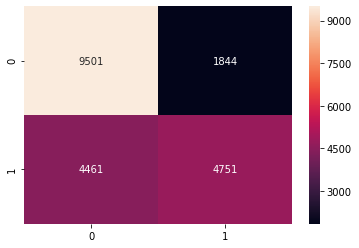

In [75]:
sns.heatmap(cm1, annot = True, fmt = "d")

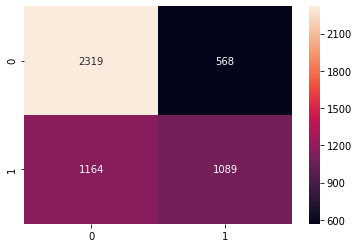

In [76]:
sns.heatmap(cm2, annot = True, fmt = "d")

In [77]:
print("Accuracy on Train Dataset= ", (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1]) * 100, "%")
print("Accuracy on Test Dataset = ", (cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]) * 100, "%")

Accuracy on Train Dataset=  69.32918227367807 %
Accuracy on Test Dataset =  66.30350194552528 %


In [78]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.68      0.84      0.75     11345
         1.0       0.72      0.52      0.60      9212

    accuracy                           0.69     20557
   macro avg       0.70      0.68      0.68     20557
weighted avg       0.70      0.69      0.68     20557

              precision    recall  f1-score   support

         0.0       0.67      0.80      0.73      2887
         1.0       0.66      0.48      0.56      2253

    accuracy                           0.66      5140
   macro avg       0.66      0.64      0.64      5140
weighted avg       0.66      0.66      0.65      5140



# Step 5b - Support Vector Classifier

In [79]:
from sklearn.svm import SVC

In [80]:
classifier = SVC(cache_size = 7000, verbose = True)
classifier.fit(X_train, y_train)

C:\Users\17655\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[LibSVM]

SVC(C=1.0, cache_size=7000, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=True)

In [81]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [82]:
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

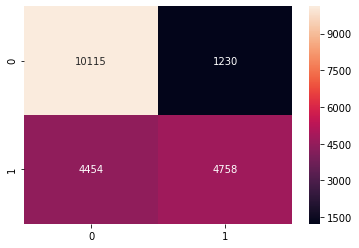

In [83]:
sns.heatmap(cm1, annot = True, fmt = "d")

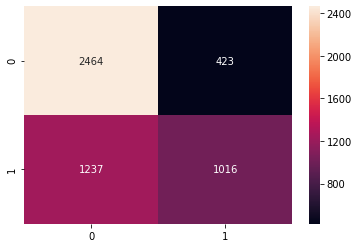

In [84]:
sns.heatmap(cm2, annot = True, fmt = "d")

In [85]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.69      0.89      0.78     11345
         1.0       0.79      0.52      0.63      9212

    accuracy                           0.72     20557
   macro avg       0.74      0.70      0.70     20557
weighted avg       0.74      0.72      0.71     20557

              precision    recall  f1-score   support

         0.0       0.67      0.85      0.75      2887
         1.0       0.71      0.45      0.55      2253

    accuracy                           0.68      5140
   macro avg       0.69      0.65      0.65      5140
weighted avg       0.68      0.68      0.66      5140



In [86]:
print("Accuracy on Train Dataset= ", (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1]) * 100, "%")
print("Accuracy on Test Dataset = ", (cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]) * 100, "%")

Accuracy on Train Dataset=  72.35005107749186 %
Accuracy on Test Dataset =  67.70428015564202 %


## Step 5c - K-Nearest Neighbours

In [88]:
# Fitting K-NN to the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [89]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [90]:
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

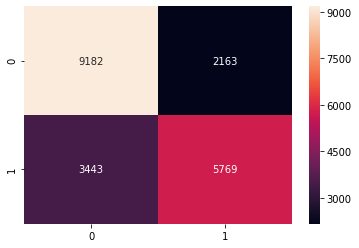

In [91]:
sns.heatmap(cm1, annot = True, fmt = "d")

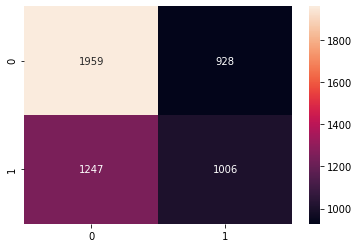

In [92]:
sns.heatmap(cm2, annot = True, fmt = "d")

In [93]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77     11345
         1.0       0.73      0.63      0.67      9212

    accuracy                           0.73     20557
   macro avg       0.73      0.72      0.72     20557
weighted avg       0.73      0.73      0.72     20557

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64      2887
         1.0       0.52      0.45      0.48      2253

    accuracy                           0.58      5140
   macro avg       0.57      0.56      0.56      5140
weighted avg       0.57      0.58      0.57      5140



In [94]:
print("Accuracy on Train Dataset= ", (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1]) * 100, "%")
print("Accuracy on Test Dataset = ", (cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]) * 100, "%")

Accuracy on Train Dataset=  72.72948387410615 %
Accuracy on Test Dataset =  57.68482490272373 %


## Step 5d - Random Forest

In [95]:
from sklearn.ensemble import RandomForestClassifier
randomforest_classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy')
randomforest_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

In [97]:
cm1 = confusion_matrix(y_train, y_pred_train)
cm2 = confusion_matrix(y_test, y_pred_test)

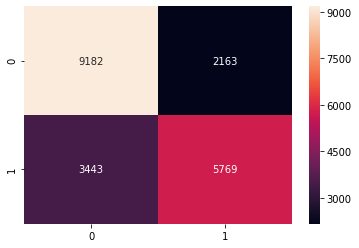

In [98]:
sns.heatmap(cm1, annot = True, fmt = "d")

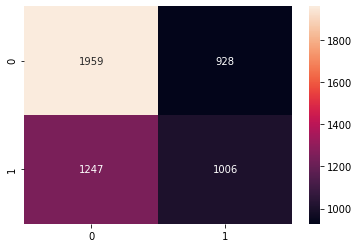

In [99]:
sns.heatmap(cm2, annot = True, fmt = "d")

In [100]:
print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

         0.0       0.73      0.81      0.77     11345
         1.0       0.73      0.63      0.67      9212

    accuracy                           0.73     20557
   macro avg       0.73      0.72      0.72     20557
weighted avg       0.73      0.73      0.72     20557

              precision    recall  f1-score   support

         0.0       0.61      0.68      0.64      2887
         1.0       0.52      0.45      0.48      2253

    accuracy                           0.58      5140
   macro avg       0.57      0.56      0.56      5140
weighted avg       0.57      0.58      0.57      5140



In [101]:
print("Accuracy on Train Dataset= ", (cm1[0,0]+cm1[1,1])/(cm1[0,0]+cm1[0,1]+cm1[1,0]+cm1[1,1]) * 100, "%")
print("Accuracy on Test Dataset = ", (cm2[0,0]+cm2[1,1])/(cm2[0,0]+cm2[0,1]+cm2[1,0]+cm2[1,1]) * 100, "%")

Accuracy on Train Dataset=  72.72948387410615 %
Accuracy on Test Dataset =  57.68482490272373 %


## Summarizing

In [102]:
table = {'Model' : ['Logistic Regression', 'Supprt Vector Classifier', 'K-Nearest Neighbour', 'Random Forest'], 'Train Accuracy': ['69.33%', '72.35%', '72.73%', '72.73%'], 'Test Accuracy' : ['66.30%', '67.70%', '57.69%', '57.69%']}
summary_table = pd.DataFrame(table, columns = ['Model', 'Train Accuracy', 'Test Accuracy'])
print(summary_table)

                      Model Train Accuracy Test Accuracy
0       Logistic Regression         69.33%        66.30%
1  Supprt Vector Classifier         72.35%        67.70%
2       K-Nearest Neighbour         72.73%        57.69%
3             Random Forest         72.73%        57.69%
